<a href="https://colab.research.google.com/github/NickMuz/workspace/blob/DataScience/Estatistica_1Revisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd 
import numpy as np
import seaborn as sns 
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}


In [3]:
dados = pd.read_csv('dados.csv')

In [4]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [5]:
classes = [
           dados.Renda.min(),
           2*788,
           5*788,
           15*788,
           25*788,
           dados.Renda.max()
]
classes

[0, 1576, 3940, 11820, 19700, 200000]

In [6]:
labels = ['E','D','C','B','A']

In [7]:
frequencia = pd.value_counts(
    pd.cut(x=dados.Renda,
           bins=classes,
           labels=labels,
           include_lowest = True
           )
)
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

In [8]:
percentual = pd.value_counts(
    pd.cut(x=dados.Renda,
           bins=classes,
           labels=labels,
           include_lowest = True
           ),
           normalize=True
)*100
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

In [10]:
dist_freq_renda = pd.DataFrame(
    {'Frequencia': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_renda.sort_index(ascending=False)

,Frequencia,Porcentagem (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


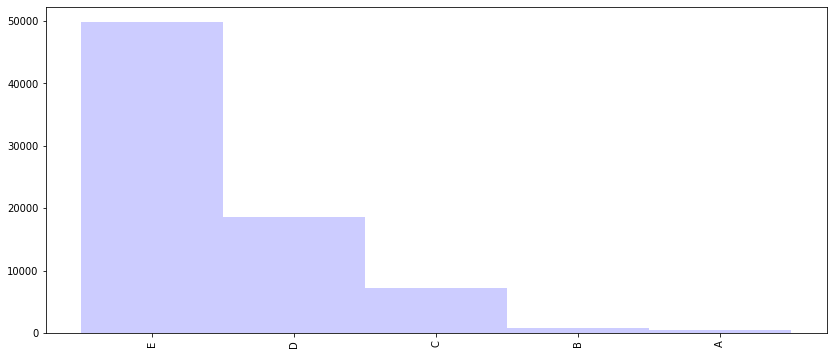

In [12]:
dist_freq_renda['Frequencia'].plot.bar(width=1,color='blue',alpha=0.2,figsize=(14,6))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


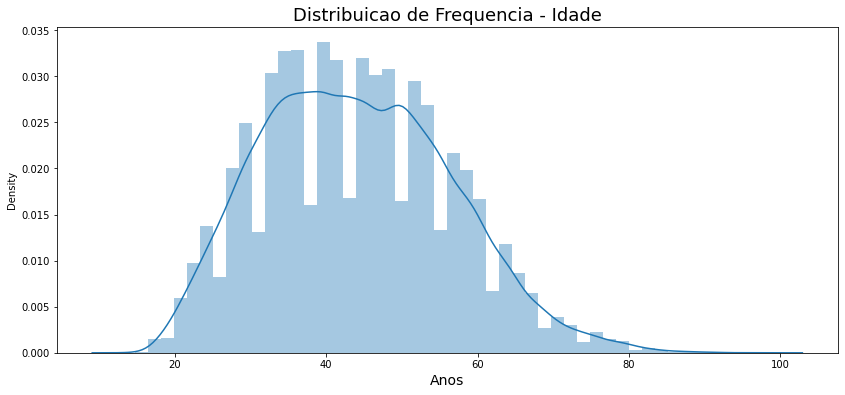

In [13]:
ax = sns.distplot(dados['Idade'])
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuicao de Frequencia - Idade', fontsize=18)
ax.set_xlabel('Anos',fontsize=14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


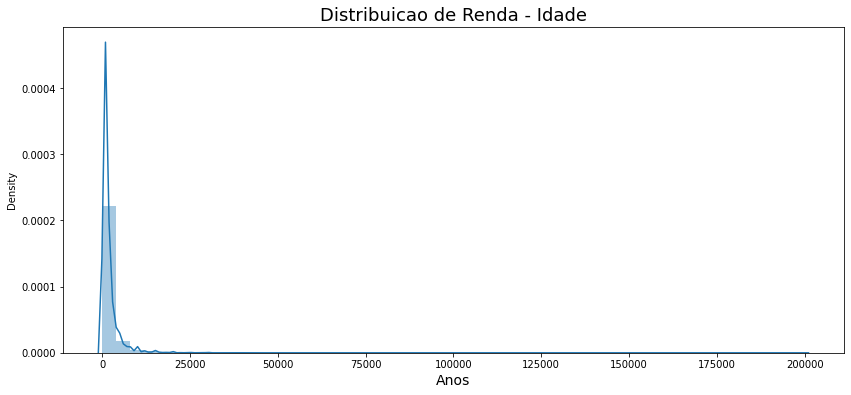

In [14]:
ax = sns.distplot(dados['Renda'])
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuicao de Renda - Idade', fontsize=18)
ax.set_xlabel('Anos',fontsize=14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


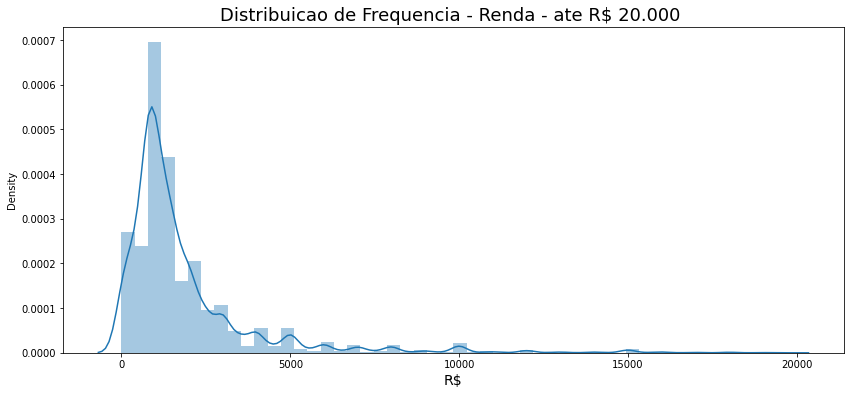

In [16]:
ax = sns.distplot(dados.query('Renda <20000')['Renda'])
ax.figure.set_size_inches(14,6)
ax.set_title('Distribuicao de Frequencia - Renda - ate R$ 20.000 ', fontsize=18)
ax.set_xlabel('R$',fontsize=14)
ax

In [18]:
frequencia = pd.crosstab(dados.Sexo,dados.Cor)
# frequencia.rename(index =sexo, inplace=True)
# frequencia.rename(columns=cor, inplace=True)
frequencia

Cor,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


In [19]:
percentual = pd.crosstab(dados.Sexo,dados.Cor,normalize=True) *100
# frequencia.rename(index =sexo, inplace=True)
# frequencia.rename(columns=cor, inplace=True)
percentual

Cor,0,2,4,6,8
Sexo,,,,,
0,0.333160,28.883394,7.160333,0.305830,32.617126
1,0.131442,12.520822,3.759761,0.152264,14.135867


In [20]:
dados.Renda.mean()

2000.3831988547631

In [21]:
dados.Renda.median()

1200.0

In [24]:
dados.Renda.mode()[0]

788

In [25]:
dados.Renda.mad()

1526.4951371644931

In [26]:
dados.Renda.var()

11044906.00622118

In [27]:
dados.Renda.std()

3323.3877303470294

In [29]:
renda_estatisticas_por_sexo_e_cor = pd.crosstab(dados.Cor,dados.Sexo,values=dados.Renda,aggfunc={'mean','median','max'}) 
renda_estatisticas_por_sexo_e_cor

max                   mean               median        
Sexo         0         1            0            1       0       1
Cor                                                               
0      10000.0  120000.0  1081.710938  2464.386139   797.5   788.0
2     200000.0  100000.0  2925.744435  2109.866750  1700.0  1200.0
4      50000.0   23000.0  1603.861687  1134.596400  1200.0   800.0
6      50000.0   20000.0  4758.251064  3027.341880  2800.0  1500.0
8     100000.0   30000.0  1659.577425  1176.758516  1200.0   800.0

In [31]:
renda_dispersao_por_sexo_e_cor = pd.crosstab(dados.Cor,dados.Sexo,
                                             aggfunc={'mad','var','std'},
                                             values=dados.Renda).round(2) 
renda_dispersao_por_sexo_e_cor

mad               std                    var              
Sexo        0        1        0         1            0             1
Cor                                                                 
0      798.91  3007.89  1204.09  11957.50   1449841.13  1.429818e+08
2     2261.01  1670.97  4750.79   3251.01  22570023.41  1.056909e+07
4      975.60   705.45  1936.31   1349.80   3749293.59  1.821960e+06
6     3709.60  2549.15  5740.82   3731.17  32957069.62  1.392166e+07
8     1125.83   811.58  2312.09   1596.23   5345747.15  2.547960e+06

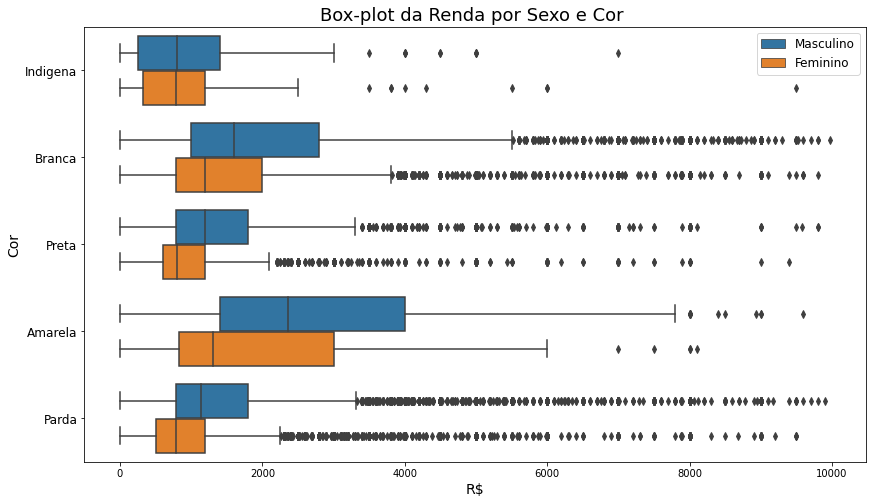

In [32]:
ax = sns.boxplot(x='Renda', y='Cor',hue='Sexo', data= dados.query('Renda<10000'),orient='h')
ax.figure.set_size_inches(14,8)
ax.set_title('Box-plot da Renda por Sexo e Cor ', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Cor', fontsize=14)
ax.set_yticklabels(['Indigena','Branca','Preta','Amarela','Parda','Sem Declaracao'], fontsize=12)
handles , _ = ax.get_legend_handles_labels()
ax.legend(handles,['Masculino','Feminino'], fontsize=12)
ax


In [35]:
from scipy import stats

#percentual de pessoas ganham salario minimo 788
percentual = stats.percentileofscore(dados.Renda, 788, kind='weak')
print("{0:.2f}%".format(percentual) )



28.87%


In [36]:
# valor maximo ganho por 99%
valor = dados.Renda.quantile(.99)
print('R$ {0:.2f}'.format(valor))

R$ 15000.00


In [37]:
#Media, mediana, valor maximo, desvio padrao da renda variavel segundo ANos de Estudo e Sexo 

renda_estatisticas_por_sexo_e_estudo = pd.crosstab(
    dados['Anos de Estudo'],
    dados.Sexo,
    aggfunc= {'mean','median','max','std'},
    values=dados.Renda).round(2)
renda_estatisticas_por_sexo_e_estudo


max               mean  ...  median      std         
Sexo                   0         1        0  ...       1        0        1
Anos de Estudo                               ...                          
1                30000.0   10000.0   799.49  ...   390.0  1023.90   639.31
2                30000.0    2000.0   895.63  ...   400.0  1331.95   425.29
3                40000.0    4000.0   931.18  ...   450.0  1435.17   498.23
4                80000.0    3500.0  1109.20  ...   500.0  2143.80   424.12
5                50000.0   10000.0  1302.33  ...   788.0  1419.82   629.55
6                35000.0    8000.0  1338.65  ...   788.0  1484.65   635.78
7                25000.0    6000.0  1448.88  ...   788.0  1476.63   574.55
8                40000.0    9000.0  1465.50  ...   788.0  1419.71   602.04
9                30000.0   18000.0  1639.40  ...   800.0  1515.58   896.78
10               60000.0   20000.0  1508.04  ...   788.0  2137.66   973.22
11               45000.0    6000.0  1731.27  ...   800.0  2078.61   620.61
12              200000.0  100000.0  2117.06  ...  1000.0  2676.54  1819.04
13               30000.0  120000.0  2470.33  ...  1200.0  2268.08  4851.83
14               25000.0   20000.0  3195.10  ...  1300.0  2797.12  2053.79
15               50000.0   20000.0  3706.62  ...  1600.0  3987.21  2064.08
16              200000.0  100000.0  6134.28  ...  2800.0  7447.61  4212.77
17                7000.0    3000.0  1295.76  ...   788.0   979.65   459.99

[17 rows x 8 columns]

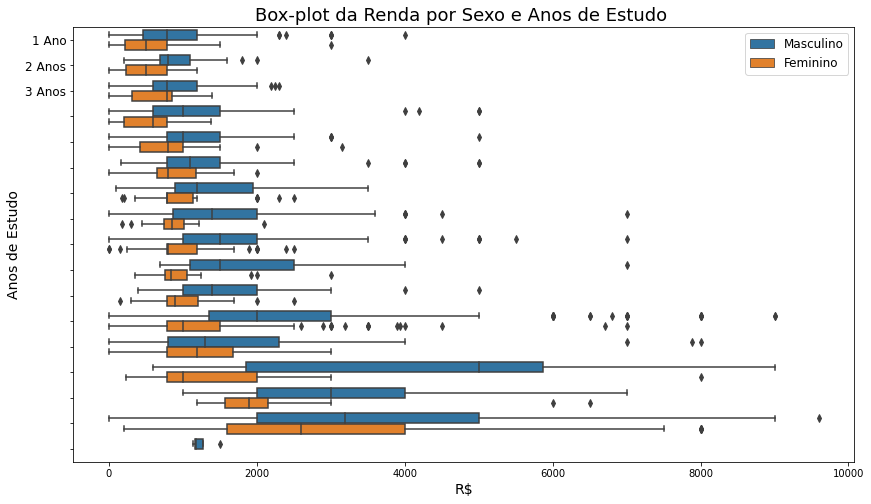

In [39]:
anos_de_estudo = {1:'1 Ano',
                  2:'2 Anos',
                  3:'3 Anos'}

ax = sns.boxplot(x='Renda', y='Anos de Estudo',hue='Sexo', data= dados.query('Renda<10000 and Idade == 50'),orient='h')
ax.figure.set_size_inches(14,8)
ax.set_title('Box-plot da Renda por Sexo e Anos de Estudo ', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Anos de Estudo', fontsize=14)
ax.set_yticklabels([key for key in anos_de_estudo.values()], fontsize=12)
handles , _ = ax.get_legend_handles_labels()
ax.legend(handles,['Masculino','Feminino'], fontsize=12)
ax

In [51]:
renda_estatisticas_por_uf = dados.groupby(['UF']).agg({'Renda':['mean','median','max','std']})
renda_estatisticas_por_uf.rename(index=uf)


Renda                            
                            mean median     max          std
UF                                                          
Rondônia             1789.761223   1200   50000  2406.161161
Acre                 1506.091782    900   30000  2276.233415
Amazonas             1445.130100    900   22000  1757.935591
Roraima              1783.588889   1000   20000  2079.659238
Pará                 1399.076871    850   50000  2053.779555
Amapá                1861.353516   1200   15580  2020.688632
Tocantins            1771.094946   1000   60000  2934.590741
Maranhão             1019.432009    700   30000  1887.816905
Piauí                1074.550784    750   40000  2373.355726
Ceará                1255.403692    789   25000  1821.963536
Rio Grande do Norte  1344.721480    800   15500  1651.805500
Paraíba              1293.370487    788   30000  1950.272431
Pernambuco           1527.079319    900   50000  2389.622497
Alagoas              1144.552602    788   11000  1237.856197
Sergipe              1109.111111    788   16000  1478.997878
Bahia                1429.645094    800  200000  3507.917248
Minas Gerais         2056.432084   1200  100000  3584.721547
Espírito Santo       2026.383852   1274  100000  3513.846868
Rio de Janeiro       2496.403168   1400  200000  5214.583518
São Paulo            2638.104986   1600   80000  3503.777366
Paraná               2493.870753   1500  200000  4302.937995
Santa Catarina       2470.854945   1800   80000  3137.651112
Rio Grande do Sul    2315.158336   1500   35000  2913.335783
Mato Grosso do Sul   2262.604167   1500   42000  3031.419122
Mato Grosso          2130.652778   1500   35000  2542.630178
Goiás                1994.580794   1500   30000  2221.933065
Distrito Federal     4241.954722   2000  100000  5550.463338

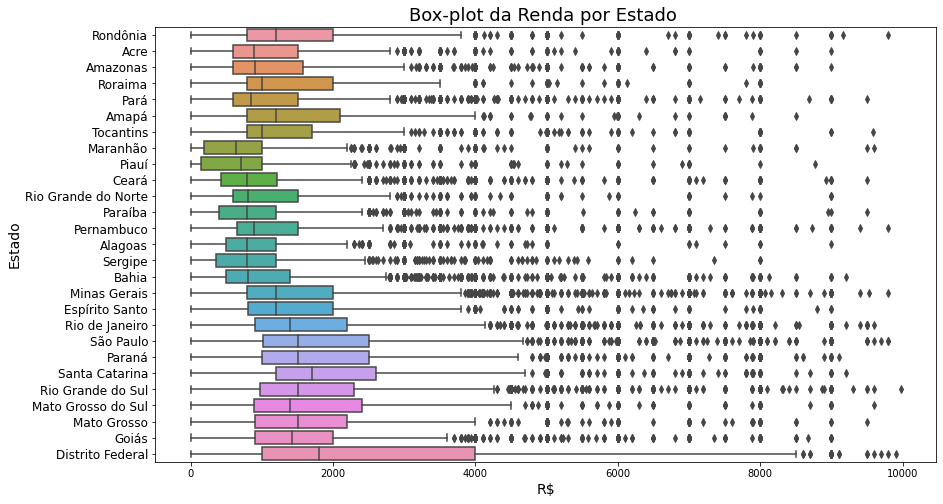

In [47]:
ax = sns.boxplot(x='Renda', y='UF', data= dados.query('Renda<10000'),orient='h')
ax.figure.set_size_inches(14,8)
ax.set_title('Box-plot da Renda por Estado ', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax.set_ylabel('Estado', fontsize=14)
ax.set_yticklabels([key for key in uf.values()], fontsize=12)
ax